# Linear Regression from Scratch

I will implement linear regression from scratch using two approaches:

Part 1) Analytical solution

Part 2) With Gradient Descent

In [42]:
import numpy as np
import matplotlib.pyplot as plt

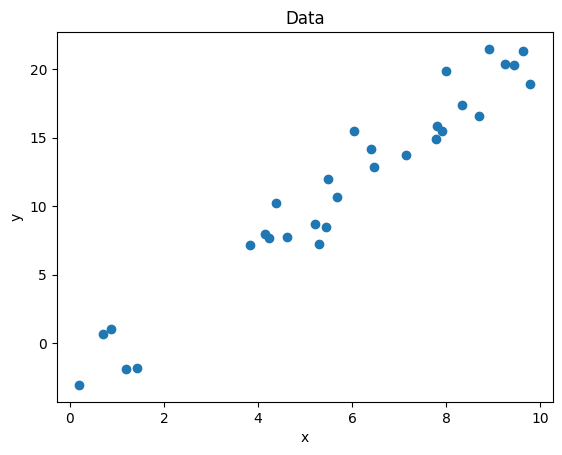

In [95]:
# Make some data 

np.random.seed(0)
n = 30
X = np.random.rand(n, 1) * 10
x1 = X.flatten()
noise = np.random.randn(n) * 1.5

real_intercept = -3.0
real_w1 = 2.5

W_real = np.column_stack([real_intercept, real_w1]).flatten()

y = W_real[0] + W_real[1] * x1 + noise

plt.scatter(x1, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data")
plt.show()


### 1) Linear Regression using the analytical solution

For linear regression, we want to find weights $W$ such that:

$XW=y$

$X^TXW=X^Ty$

If $X^TX$ is invertible, the optimal $W$ is:

$W=(X^TX)^{-1}X^Ty$

This gives the exact solution in one step and works well when the number of features is small.

In [96]:
# to get the intercept we must add a column of 1's to X

X_b = np.column_stack([np.ones(len(X)), X])

W = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

print(W)

[-2.93294281  2.4629245 ]


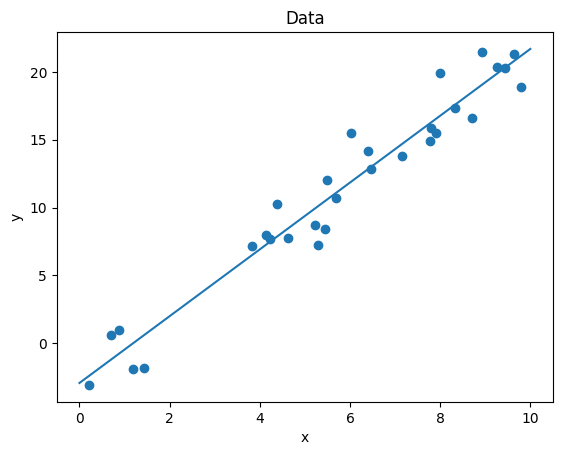

In [97]:
xs = np.linspace(0, 10, 100)
ys = W[0] + W[1] * xs

plt.scatter(x1, y)
plt.plot(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data")
plt.show()

### 2) Linear Regression with Gradient Descent

For large or high-dimensional datasets, the analytical solution becomes expensive or unstable to compute.
In that case, we can optimize $W$ with gradient descent.

We minimize the mean squared error:

$L=\frac{1}{n}\|y-XW\|^2$

The gradient is:

$\nabla_WL=\frac{2}{n}X^T(y-XW)$

We update using:

$W:=W-\alpha\nabla_WL$

In [138]:
def lin_reg_grad_desc(X, y, lr=0.01, n_iters=1000):

    n, d = X.shape
    Xb = np.hstack([np.ones((n, 1)), X]) 

    W = np.zeros(d + 1) # initializing to zero vector

    for i in range(n_iters):
        y_pred = Xb @ W

        error = y_pred - y

        # Gradient
        grad = (2 / n) * Xb.T @ error

        # Gradient Descent update
        W -= lr * grad

    return W

In [139]:
W_gd = lin_reg_grad_desc(X, y, lr=0.01, n_iters=1000)
print(W_gd)


[-2.85397103  2.45184878]


### Bonus: Lasso and Ridge Regression

Regularization helps prevent overfitting by penalizing large weights. With 1 feature, regularization causes the slope of the line to go towards 0

#### Ridge (L2)

Adds a penalty proportional to $\|W\|^2_2$

This is shrinks weights smoothly

#### Lasso (L1)

Adds a penalty proportional to $\|W\|$

This encourages sparsity

#### Elastic Net

The combination of both

In [140]:
def lin_reg_regularization(X, y, lr=0.01, n_iters=1000, l1=0.0, l2=0.0):

    n, d = X.shape
    Xb = np.hstack([np.ones((n, 1)), X]) 

    W = np.zeros(d + 1) # initializing to zero vector

    for i in range(n_iters):
        y_pred = Xb @ W
        error = y_pred - y

        # Gradient
        grad = (2 / n) * Xb.T @ error
        
        # Add L2 gradient (Ridge):
        grad[1:] += 2 * l2 * W[1:]

        # Add L1 gradient (Lasso):
        grad[1:] += l1 * np.sign(W[1:])
        
        # Gradient Descent update
        W -= lr * grad


    return W

In [141]:
W_reg = lin_reg_regularization(X, y, lr=0.01, l1=0.1, l2=0.3)
print(W_reg)


[-2.31246749  2.35805468]


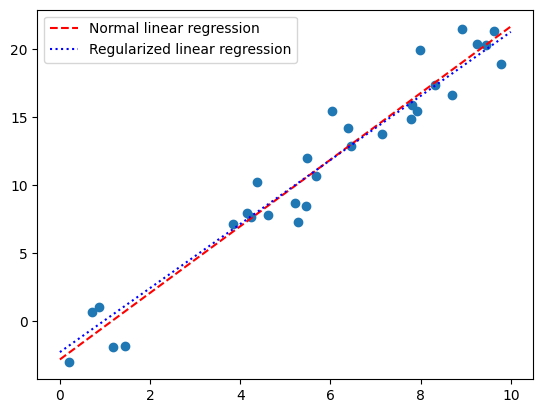

In [142]:
xs = np.linspace(0, 10, 100)
y_gd = W_gd[0] + W_gd[1] * xs
y_reg = W_reg[0] + W_reg[1] * xs

plt.scatter(x1, y)
plt.plot(xs, y_gd, 'r--', label="Normal linear regression")
plt.plot(xs, y_reg, 'b:', label="Regularized linear regression")
plt.legend()
plt.show()

Finally, below is code on how to use linear regression with the sklearn library:

In [135]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

reg = LinearRegression().fit(X, y)
print(reg.intercept_)
print(reg.coef_)


-2.9329428083869633
[2.4629245]


### Conclusion

- The analytical solution is exact but becomes impractical in high dimensions.

- Gradient descent is flexible and scales well to large datasets.

- Lasso and Ridge add regularization: Ridge shrinks weights smoothly, while Lasso can set some weights to zero.